Question 1.) How did you choose the stocks?
- Fristly I see which kinda stock i wanna invest in, like is it a holding company, or a production company, etc. Then read it's annual report and observe it's in investment plaming, recent investments, recent products launch, main product, etc. Then If it goes well, them to see it's parameters such as R.O.E, Debt/eq., cash cycle,R.O.C.E, etc. and also these parameters depends on the which type of company in am going to invest like if it's a banking company then
NIM%, ROA%,C.A.S.A. etc. are the good parameters to look onto. I think that's it.

Question 2.)What is the impact of increasing the number of stocks in the portfolio?
- In our case if we increase the number of quality stocks in our portfolio then the chances of lose decrease as we have only 5 stocks in prootfolio but ideally it should be more then 10 and less then 45.  

Question 3.) Why are calculating the weights by optimization and not giving equal weightage to every stock?
- we use optimization to reduce to risk of lose, we give high weight to those stock in which we beleive growth, but by this one may question that why don't you just have 1 stock in which you believe because there's nothing for sure in stock market so, to reduce the risk we invest in multiple stocks using optimization.

Question 4.) Which optimization techniques are used by Mutual Funds currently?
- we have many techniques that we can use but currently it's Monte Carlo Optimization. 


Question 5.) Which parameters are you using to check the accuracy of your model?
- Correlation and risk evaluation



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
tick = ['TSLA', 'MSFT', 'SNE', 'LNVGY', 'AAPL']
price_data = web.get_data_yahoo(tick,
                           start = '2014-01-01',
                           end = '2018-05-31')['Adj Close']

In [ ]:
log_ret = np.log(price_data/price_data.shift(1))

In [ ]:
cov_mat = log_ret.cov() * 252
print(cov_mat)


Symbols      TSLA      MSFT       SNE     LNVGY      AAPL
Symbols                                                  
TSLA     0.168256  0.028156  0.028231  0.021502  0.026175
MSFT     0.028156  0.049867  0.022846  0.016335  0.024165
SNE      0.028231  0.022846  0.093506  0.016922  0.022071
LNVGY    0.021502  0.016335  0.016922  0.104668  0.012844
AAPL     0.026175  0.024165  0.022071  0.012844  0.052319


In [ ]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [ ]:
for i in range(num_port):
  wts = np.random.uniform(size = len(price_data.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_ret.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

In [ ]:
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.02465875 0.31071006 0.12917678 0.19444026 0.34101415]


In [ ]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[1.91599881e-02 5.50954372e-01 7.52482709e-02 2.35221928e-04
 3.54402147e-01]


In [ ]:
print(sharpe_ratio.max())


1.3836358816938996


In [ ]:
print(port_risk.min())

0.17664140804614994


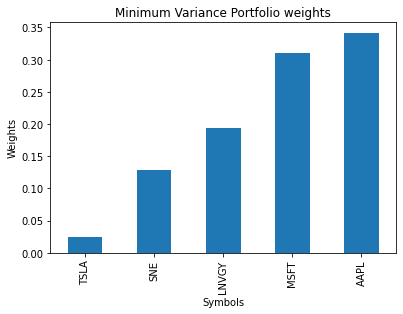

In [ ]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

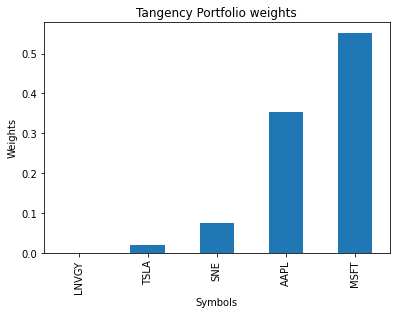

In [ ]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();

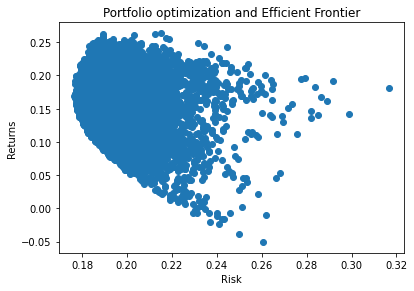

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show();
